<div class="alert alert-block alert-info">
<center> <h1> Text Mining - 2022/2023 </h1> </center> <br>
<center> Group 17 </center>

**Table of Contents** <br>
* [1.Data Import](#dataimport)
    * [1.1.Import Libraries](#importlibraries)
    * [1.2.Import Datasets](#importdatasets)
        * [1.2.1. Airbnb](#airbnb)
        * [1.2.2. Reviews](#reviews)
* [2.Data Exploration](#dataexploration)
    * [2.1. Missing Values](#missingvalues)
    * [2.2. Target data exploration](#targetdataexploration)
    * [2.3. Independent Features data exploration](#independentdataexploration)
        * [2.2.1. Word Counts](#wordcounts)
        * [2.2.2. Detecting Language](#language)
* [3.Data Preprocessing](#datapreprocessing)
* [4.Classification Models](#classificationmodels)
    * [4.1. Define training features - Bag of Words (Bow)](#bow)
    * [4.2. KNeighborsClassifier](#KNN)
    * [4.3. Random Forest](#randomforest)


<hr>
<a class="anchor" id="dataimport">
    
# 1. Data Import
    
</a>

<hr>
<a class="anchor" id="importlibraries">
    
## 1.1. Import Libraries
    
</a>

In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

#Tokenization
import nltk
from nltk.tokenize import word_tokenize

#Punctuation
import string

#Stop Words
from nltk.corpus import stopwords

#Regular Expressions
import re

# Stemming and Lemmatization
from nltk.stem import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer

# For displaying progress bars during iterative tasks
from tqdm import tqdm

# Data Partition
from sklearn.model_selection import train_test_split, StratifiedKFold, RepeatedStratifiedKFold

# Create BoW - Bag of Words
from sklearn.feature_extraction.text import CountVectorizer

# Classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

# Evaluate
from sklearn.metrics import classification_report

# confusion_matrix
from sklearn.metrics import confusion_matrix

# Translator
from langdetect import detect
from googletrans import Translator
import os

# Remove emoji
import emoji

#Scaller
from sklearn.preprocessing import MinMaxScaler

<hr>
<a class="anchor" id="importdatasets">
    
## 1.2. Import Datasets
    
</a>

<hr>
<a class="anchor" id="airbnb">
    
### 1.2.1. Airbnb
    
</a>

In [2]:
airbnb_df_train = pd.read_excel('train.xlsx')
airbnb_df_train.head()

,index,description,host_about,unlisted
0,1,"This is a shared mixed room in our hostel, wit...",Alojamento Local Registro: 20835/AL,0
1,2,"O meu espaço fica perto de Parque Eduardo VII,...","I am friendly host, and I will try to always b...",1
2,3,Trafaria’s House is a cozy and familiar villa ...,"I am a social person liking to communicate, re...",1
3,4,"Apartamento Charmoso no Chiado, Entre o Largo ...",Hello!_x000D_\nI m Portuguese and i love to me...,0
4,5,Joli appartement en bordure de mer.<br /> 2 m...,Nous sommes une famille avec deux enfants de 1...,0


<hr>
<a class="anchor" id="reviews">
    
### 1.2.2. Reviews
    
</a>

In [3]:
reviews_df_train = pd.read_excel('train_reviews.xlsx')
reviews_df_train.head()

,index,comments
0,1,this is a very cozy and comfortable house to s...
1,1,good<br/>
2,1,"My first hostel experience, and all I have to ..."
3,1,Das Hostel war neu und deshalb funktionierte a...
4,1,"It was fine for a dorm, but I think for the pe..."


<hr>
<a class="anchor" id="dataexploration">
    
# 2. Data Exploration
    
</a>

<hr>
<a class="anchor" id="missingvalues">
    
## 2.1. Missing Values
    
</a>

In [4]:
airbnb_df_train.isna().sum()

index          0
description    0
host_about     0
unlisted       0
dtype: int64

In [5]:
reviews_df_train.isna().sum()

index       0
comments    0
dtype: int64

<div class="alert alert-block alert-success">
    There is no missing values in any features

<hr>
<a class="anchor" id="targetdataexploration">
    
## 2.2. Target data exploration
    
</a>

Check the unique values.

In [6]:
(airbnb_df_train['unlisted']).unique()

array([0, 1], dtype=int64)

Some statistics about target values

In [7]:
(airbnb_df_train['unlisted']).describe()

count    12496.000000
mean         0.277129
std          0.447598
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: unlisted, dtype: float64

But it is better to visualize it.

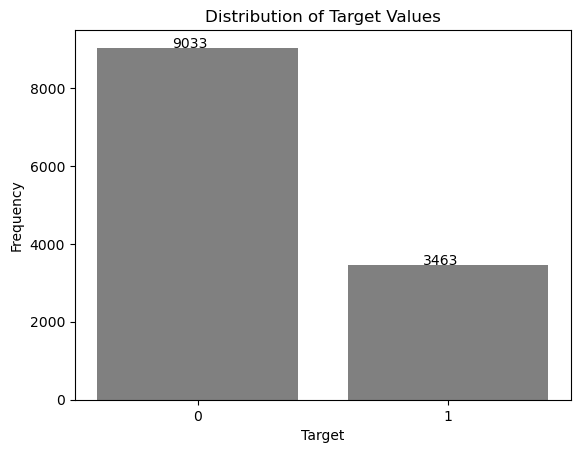

In [8]:
# Calculate the frequency of each rating
counts = airbnb_df_train['unlisted'].value_counts()

# Create a bar chart of the ratings
plt.bar(counts.index, counts.values, color = 'grey')
plt.xlabel('Target')
plt.ylabel('Frequency')
plt.title('Distribution of Target Values')
plt.xticks(range(0,2))

# Add the value of each bar to the plot
for i, v in enumerate(counts.values):
    plt.text(counts.index[i] - 0.1, v + 0.1, str(v))

plt.show()

In [9]:
airbnb_df_train['unlisted'].value_counts(normalize = True)

0    0.722871
1    0.277129
Name: unlisted, dtype: float64

<div class="alert alert-block alert-danger">  
Labels are not balanced.
</div>

<hr>
<a class="anchor" id="independentdataexploration">
    
## 2.3. Independent Features data exploration
    
</a>

<hr>
<a class="anchor" id="wordcounts">
    
### 2.3.1. Word Counts
    
</a>

We will split our texts into tokens and count how many tokens exist in each document.

**Description**

In [10]:
airbnb_df_train['word_count_description']  = airbnb_df_train['description'].apply(lambda x: len(str(x).split(" ")))
airbnb_df_train[['description','word_count_description']].head()

,description,word_count_description
0,"This is a shared mixed room in our hostel, wit...",127
1,"O meu espaço fica perto de Parque Eduardo VII,...",23
2,Trafaria’s House is a cozy and familiar villa ...,170
3,"Apartamento Charmoso no Chiado, Entre o Largo ...",47
4,Joli appartement en bordure de mer.<br /> 2 m...,101


Descriptive Statistics of word count

In [11]:
airbnb_df_train.word_count_description.describe()

count    12496.000000
mean       132.663572
std         48.494104
min          3.000000
25%         99.000000
50%        157.000000
75%        167.000000
max        210.000000
Name: word_count_description, dtype: float64

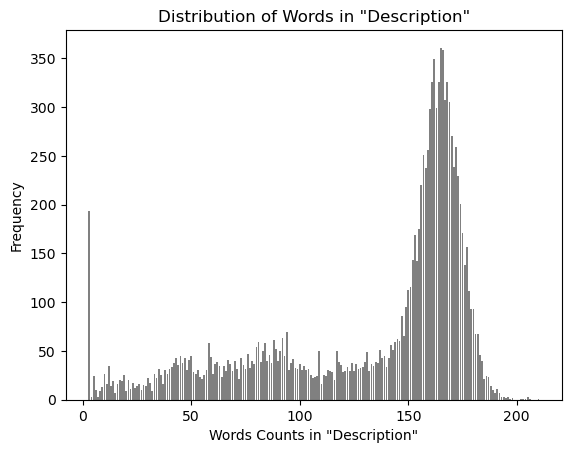

In [12]:
# Calculate the frequency of each rating
counts_desc = airbnb_df_train['word_count_description'].value_counts()

# Create a bar chart of the ratings
plt.bar(counts_desc.index, counts_desc.values, color = 'grey')
plt.xlabel('Words Counts in "Description"')
plt.ylabel('Frequency')
plt.title('Distribution of Words in "Description"')

plt.show()

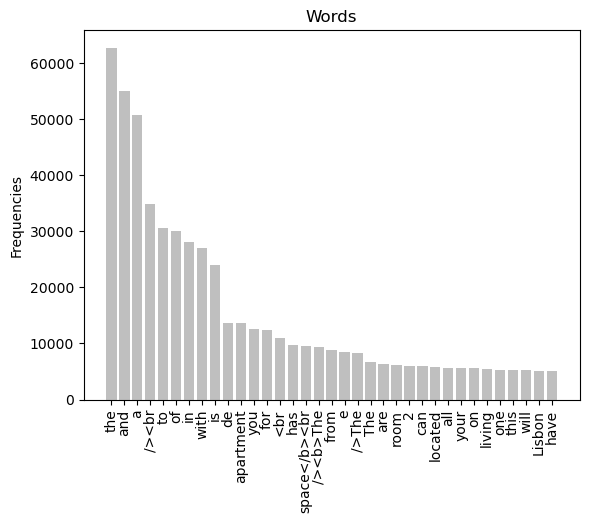

In [13]:
# Create a list with all words in airbnb_df_train['description']
all_words_desc = ' '.join(airbnb_df_train['description']).split()
# The frequency of each word
freq_desc = pd.Series(all_words_desc).value_counts()

# A bar plot with the top 35 words, from description column
x_labels = freq_desc.index[0:35]
values = freq_desc[:35]
plt.bar(x_labels, values, align='center', alpha=0.5, color = 'grey')
plt.xticks(x_labels)
plt.ylabel('Frequencies')
plt.title('Words')
plt.xticks(rotation=90)
plt.show()


**host_about**

In [14]:
airbnb_df_train['word_count_host_about']  = airbnb_df_train['host_about'].apply(lambda x: len(str(x).split(" ")))
airbnb_df_train[['host_about','word_count_host_about']].head()

,host_about,word_count_host_about
0,Alojamento Local Registro: 20835/AL,4
1,"I am friendly host, and I will try to always b...",24
2,"I am a social person liking to communicate, re...",45
3,Hello!_x000D_\nI m Portuguese and i love to me...,31
4,Nous sommes une famille avec deux enfants de 1...,37


Descriptive Statistics of word count

In [15]:
airbnb_df_train.word_count_host_about.describe()

count    12496.000000
mean        73.031050
std         77.132867
min          1.000000
25%         26.000000
50%         55.000000
75%        102.000000
max       1387.000000
Name: word_count_host_about, dtype: float64

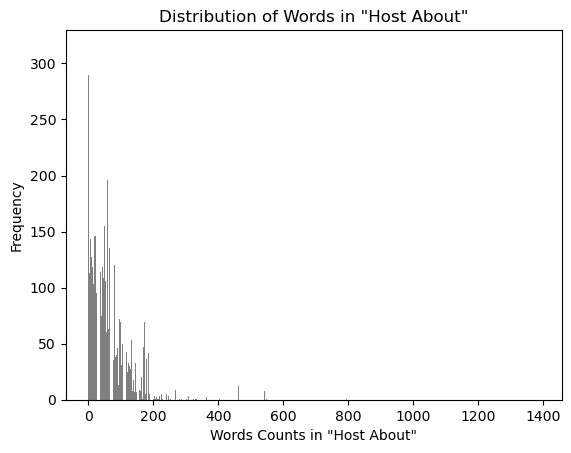

In [16]:
# Calculate the frequency of each rating
counts_host = airbnb_df_train['word_count_host_about'].value_counts()

# Create a bar chart of the ratings
plt.bar(counts_host.index, counts_host.values, color = 'grey')
plt.xlabel('Words Counts in "Host About"')
plt.ylabel('Frequency')
plt.title('Distribution of Words in "Host About"')

plt.show()

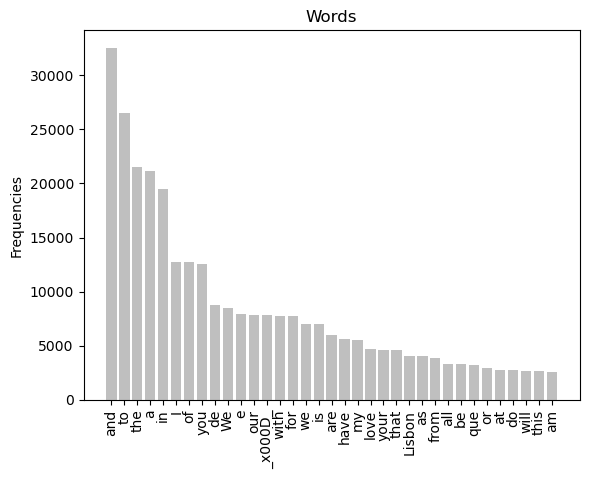

In [17]:
# Create a list with all words in airbnb_df_train['hoost_about']
all_words_host = ' '.join(airbnb_df_train['host_about']).split()
# The frequency of each word
freq_host = pd.Series(all_words_host).value_counts()

# A bar plot with the top 35 words, for 'host_about' column
x_labels = freq_host.index[0:35]
values = freq_host[:35]
plt.bar(x_labels, values, align='center', alpha=0.5, color = 'grey')
plt.xticks(x_labels)
plt.ylabel('Frequencies')
plt.title('Words')
plt.xticks(rotation=90)
plt.show()

**Comments**

In [18]:
reviews_df_train['word_count_comments']  = reviews_df_train['comments'].apply(lambda x: len(str(x).split(" ")))
reviews_df_train[['comments','word_count_comments']].head()

,comments,word_count_comments
0,this is a very cozy and comfortable house to s...,28
1,good<br/>,1
2,"My first hostel experience, and all I have to ...",261
3,Das Hostel war neu und deshalb funktionierte a...,81
4,"It was fine for a dorm, but I think for the pe...",27


In [19]:
reviews_df_train.word_count_comments.describe()

count    721402.000000
mean         47.993793
std          46.922807
min           1.000000
25%          18.000000
50%          36.000000
75%          63.000000
max        1064.000000
Name: word_count_comments, dtype: float64

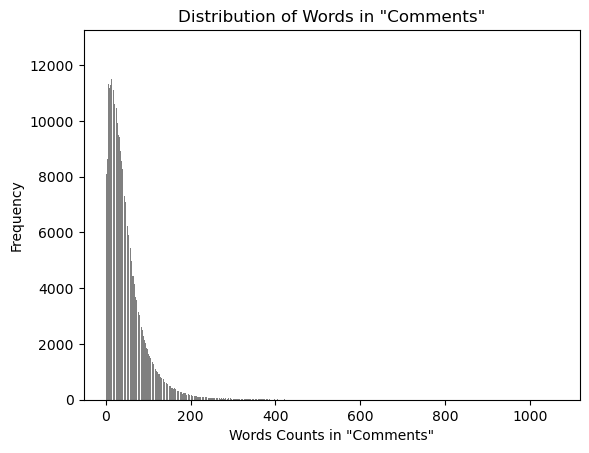

In [20]:
# Calculate the frequency of each rating
counts_host = reviews_df_train['word_count_comments'].value_counts()

# Create a bar chart of the ratings
plt.bar(counts_host.index, counts_host.values, color = 'grey')
plt.xlabel('Words Counts in "Comments"')
plt.ylabel('Frequency')
plt.title('Distribution of Words in "Comments"')

plt.show()

In [21]:
# Checking if there are rows where 'comments' is numberic
numeric_column = pd.to_numeric(reviews_df_train['comments'], errors='coerce')
numeric_rows = reviews_df_train[~numeric_column.isna()] # rows with successful conversion
numeric_rows.head()

,index,comments,word_count_comments
26593,468,10,1
62305,1062,1,1
83596,1397,1,1
160070,2696,0,1
211858,3593,9,1


In [22]:
reviews_df_train['comments'] = reviews_df_train['comments'].astype('string')

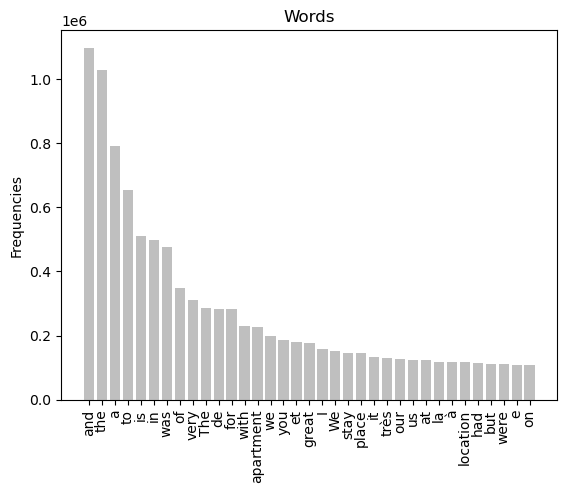

In [23]:
# Create a list with all words in reviews_df_train['comments']
all_words_comments = ' '.join(reviews_df_train['comments']).split()
# The frequency of each word
freq_host = pd.Series(all_words_comments).value_counts()

# A bar plot with the top 35 words, for 'comments' column
x_labels = freq_host.index[0:35]
values = freq_host[:35]
plt.bar(x_labels, values, align='center', alpha=0.5, color = 'grey')
plt.xticks(x_labels)
plt.ylabel('Frequencies')
plt.title('Words')
plt.xticks(rotation=90)
plt.show()

<hr>
<a class="anchor" id="language">
    
### 2.3.2. Detecting Language
    
</a>

In [24]:
# Define a function to detect the language of a string
def detect_language(text):
    try:
        lang = detect(text)
    except:
        lang = None
    return lang

**Airbnb**

In [26]:
#airbnb_df_train.to_csv('train_airbnb.csv', index=False)

In [27]:
# Detecting languages 
#source_file = 'train_airbnb.csv'
#destination_file = 'train_airbnb_with_language.csv'

#chunk_size = 1000
#chunk_iterator = pd.read_csv(source_file, chunksize=chunk_size)

# Processing data in chunks
#for chunk in tqdm(chunk_iterator):   
#    chunk['language_description'] = chunk['description'].apply(detect_language)
#    chunk['language_host_about'] = chunk['host_about'].apply(detect_language)
#    chunk.to_csv(destination_file, 
#                 index=False, 
#                 mode='a', 
#                 header=not os.path.exists(destination_file))

13it [02:12, 10.19s/it]


In [28]:
airbnb_df_train = pd.read_csv('train_airbnb_with_language.csv')
airbnb_df_train.head()

,index,description,host_about,unlisted,word_count_description,word_count_host_about,language_description,language_host_about
0,1,this is a shared mixed room in our hostel wit...,Alojamento Local Registro: 20835/AL,0,127,4,en,pt
1,2,o meu espa o fica perto de parque eduardo vii ...,"I am friendly host, and I will try to always b...",1,23,24,pt,en
2,3,trafaria s house is a cozy and familiar villa ...,"I am a social person liking to communicate, re...",1,170,45,en,en
3,4,apartamento charmoso no chiado entre o largo ...,Hello!_x000D_\nI m Portuguese and i love to me...,0,47,31,pt,en
4,5,joli appartement en bordure de mer br m...,Nous sommes une famille avec deux enfants de 1...,0,101,37,fr,fr


In [36]:
# How many languages are in description column:
description_language = airbnb_df_train['language_description'].unique()
print(description_language)

['en' 'pt' 'fr' 'es' 'de' 'no' 'da' 'ca' 'sv' 'it' 'nl' 'ro' 'pl' 'zh-cn'
 'ru']


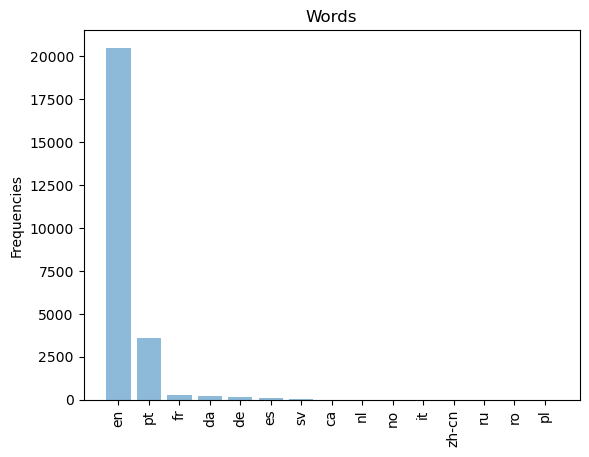

In [38]:
freq = pd.Series(airbnb_df_train['language_description']).value_counts()

x_labels = freq.index[0:20]
values = freq[:20]
plt.bar(x_labels, values, align='center', alpha=0.5)
#plt.xticks(values, x_labels)
plt.ylabel('Frequencies')
plt.title('Words')
plt.xticks(rotation=90)
plt.show()

In [37]:
# How many languages are in host_about column:
description_host_about = airbnb_df_train['language_host_about'].unique()
print(description_host_about)

['pt' 'en' 'fr' nan 'es' 'ko' 'de' 'it' 'so' 'nl' 'zh-cn' 'ca' 'no' 'sv'
 'af' 'sw' 'zh-tw' 'da' 'fi' 'lt' 'sk' 'tl' 'ro' 'tr' 'et' 'sl' 'he' 'vi'
 'id' 'hr' 'ru' 'cs' 'hu']


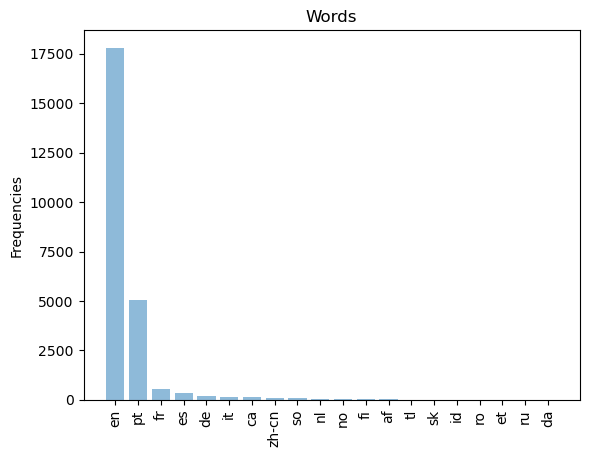

In [39]:
freq = pd.Series(airbnb_df_train['language_host_about']).value_counts()

x_labels = freq.index[0:20]
values = freq[:20]
plt.bar(x_labels, values, align='center', alpha=0.5)
#plt.xticks(values, x_labels)
plt.ylabel('Frequencies')
plt.title('Words')
plt.xticks(rotation=90)
plt.show()

**Review**

In [31]:
#reviews_df_train.to_csv('train_reviews.csv', index=False)

In [32]:
# Detecting languages 
#source_file = 'train_reviews.csv'
#destination_file = 'reviews_with_language.csv'

#chunk_size = 1000
#chunk_iterator = pd.read_csv(source_file, chunksize=chunk_size)

# Processing data in chunks
#for chunk in tqdm(chunk_iterator):
#    chunk['language'] = chunk['comments'].apply(detect_language)
#    chunk.to_csv(destination_file, 
#                 index=False, 
#                 mode='a', 
#                 header=not os.path.exists(destination_file))

722it [45:39,  3.79s/it]


In [34]:
reviews_df_train = pd.read_csv('reviews_with_language.csv')
reviews_df_train.iloc[1000:1110, :]

,index,comments,language
1000,23,"A well equipt, clean unit in an ideal location...",en
1001,23,Great place!,en
1002,23,Joao and his colleagues are all very kind and ...,en
1003,23,L'appartement est très bien. L'agence est top ...,fr
1004,23,1ère visite de Lisbonne: le logement est situé...,fr
...,...,...,...
1105,24,"Newly, well located, fully equipped and clean ...",en
1106,24,"Very nice place! Great location, very helpful ...",en
1107,24,The appartement was pretty and of good taste o...,en
1108,24,Wonderful little apartment in a beautiful city!,en


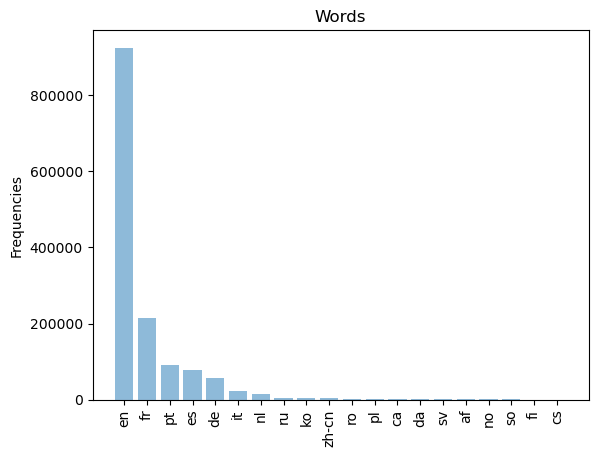

In [35]:
freq = pd.Series(reviews_df_train['language']).value_counts()

x_labels = freq.index[0:20]
values = freq[:20]
plt.bar(x_labels, values, align='center', alpha=0.5)
#plt.xticks(values, x_labels)
plt.ylabel('Frequencies')
plt.title('Words')
plt.xticks(rotation=90)
plt.show()

<hr>
<a class="anchor" id="datapreprocessing">
    
# 3. Data Preprocessing
    
</a>

Defining a function to do the data Preprocessing for each column

In [109]:
def clean(text_list, lemmatize, stemmer):
    
    updates = []
    text_list.fillna('', inplace=True)
    for j in tqdm(text_list):
        
        text = j
        
        # Lowercase Text
        text = text.lower()
                
        # Remove Numerical data and puctuation
        text = re.sub("[^a-zA-Z]"," ", text )
        # [^&] - Returns a match for any character EXCEPT &.
        # a-zA-Z - Returns a match for any character alphabetically between a and z, lower case or upper case.
        
        # Remove Stopwords
        stop_english = set(stopwords.words('english'))
        stop_portuguese = set(stopwords.words('portuguese'))
        text = " ".join([word for word in text.split() if word not in stop_english])
        text = " ".join([word for word in text.split() if word not in stop_portuguese])
        
        # Remove all 'br', 'b' and 'x'
        remove = ['br', 'b', 'x']
        text = " ".join([word for word in text.split() if word not in remove])
        
        # Remove Emoji
        text = " ".join([word for word in text.split() if pd.notna(word)])
        
        # Lemmatize
        lemma = WordNetLemmatizer()
        if lemmatize:
            text = " ".join(lemma.lemmatize(word) for word in text.split())
        
        # Stemming
        stemmer_english = SnowballStemmer('english')
        stemmer_portuguese = SnowballStemmer('portuguese')
        if stemmer:
            text = " ".join(stemmer_english.stem(word) for word in text.split())
            text = " ".join(stemmer_portuguese.stem(word) for word in text.split())
                      
        updates.append(text)
        
    return updates

**Description**

In [61]:
updates_desc = clean(airbnb_df_train['description'], lemmatize = True, stemmer = True)

100%|██████████| 24992/24992 [01:20<00:00, 311.51it/s]


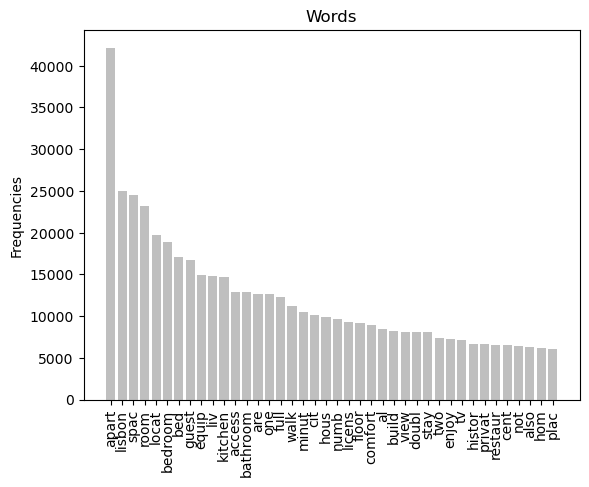

In [62]:
# create a list with all words in airbnb_df_train['description']
all_words_desc_proc = ' '.join(updates_desc).split()

# The frequency of each word
freq_desc_proc = pd.Series(all_words_desc_proc).value_counts()

# A bar plot with the top 35 words, for 'host_about' column
x_labels = freq_desc_proc.index[0:40]
values = freq_desc_proc[:40]
plt.bar(x_labels, values, align='center', alpha=0.5, color = 'grey')
plt.xticks(x_labels)
plt.ylabel('Frequencies')
plt.title('Words')
plt.xticks(rotation=90)
plt.show()

In [63]:
unique_words_desc_proc = sorted(set(all_words_desc_proc))
len(unique_words_desc_proc)

14733

In [64]:
len(all_words_desc)

1648726

<div class="alert alert-block alert-success">
Before the data preprocessing, we had 1.648.726 unique words after we reduced it to 14.733 words.

The list of unique words in the Description

In [65]:
print(unique_words_desc_proc)

['aanwezig', 'ab', 'aba', 'abad', 'abaiss', 'abaix', 'abaj', 'aban', 'abandon', 'abarrac', 'abast', 'abbaubar', 'abelh', 'abelheir', 'aben', 'abend', 'abenteur', 'aber', 'abert', 'abertur', 'abgehend', 'abgeht', 'abgeschliffen', 'abgeschlossen', 'abh', 'abholung', 'abid', 'abient', 'abil', 'abklappern', 'abl', 'abli', 'abnb', 'aboard', 'abod', 'abond', 'abonn', 'abordag', 'abou', 'abound', 'abr', 'abra', 'abrac', 'abrangent', 'abre', 'abrig', 'abril', 'abrir', 'abroad', 'abrunheir', 'abschalten', 'abseit', 'absenc', 'absens', 'absolu', 'absolut', 'absolutament', 'absorb', 'absorv', 'abster', 'abstract', 'absurd', 'abund', 'abus', 'abut', 'ac', 'aca', 'acab', 'acabamentosapart', 'acac', 'acad', 'academ', 'acapulc', 'acas', 'acc', 'acced', 'acceess', 'accent', 'accentu', 'accep', 'accept', 'acces', 'accesor', 'access', 'accessib', 'accessibilit', 'accessibl', 'accessor', 'accesst', 'accid', 'acclaim', 'acco', 'accom', 'accommod', 'accommodat', 'accomod', 'accompan', 'accomplish', 'accord

<div class="alert alert-block alert-danger"> 
We still have many words with the same meaning because we have different language like Lisbon:
'lisbo', 'lisboabo', 'lisboad', 'lisboaet', 'lisboan', 'lisboet', 'lisbom', 'lisbon', 'lisbonaccommod', 'lisboncmanag', 
'lisbonens', 'lisbonian', 'lisbonit', 'lisbonluxhom', 'lisbonn', 'lisbonnn'

**host_about**

In [66]:
updates_host = clean(airbnb_df_train['host_about'], lemmatize = True, stemmer = True)

100%|██████████| 24992/24992 [00:50<00:00, 491.11it/s]


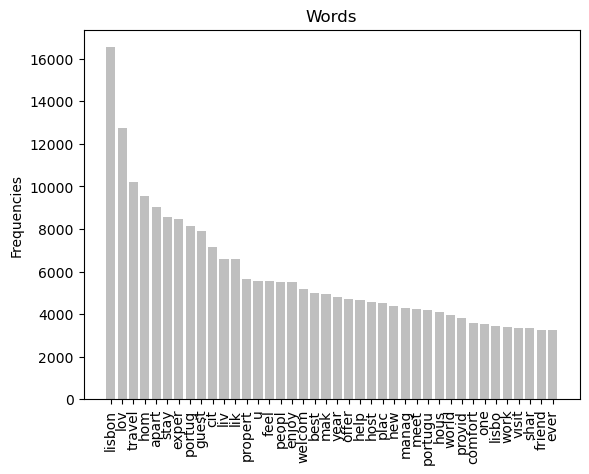

In [67]:
# create a list with all words in airbnb_df_train['host_about']
all_words_host_proc = ' '.join(updates_host).split()

# The frequency of each word
freq_host_proc = pd.Series(all_words_host_proc).value_counts()

# A bar plot with the top 35 words, for 'host_about' column
x_labels = freq_host_proc.index[0:40]
values = freq_host_proc[:40]
plt.bar(x_labels, values, align='center', alpha=0.5, color = 'grey')
plt.xticks(x_labels)
plt.ylabel('Frequencies')
plt.title('Words')
plt.xticks(rotation=90)
plt.show()

In [68]:
unique_words_host = sorted(set(all_words_host_proc))
len(unique_words_host)

10912

In [69]:
len(all_words_host)

931865

<div class="alert alert-block alert-success">
For hosts_about, before the data preprocessing, we had 931.865 unique words after we reduced it to 10.912 words.

Update our data frame with the new text preprocessed

In [87]:
airbnb_df_train = airbnb_df_train.drop(['word_count_description'], axis=1)
airbnb_df_train = airbnb_df_train.drop(['word_count_host_about'], axis=1)
airbnb_df_train.update(pd.DataFrame({"description": updates_desc}))
airbnb_df_train.update(pd.DataFrame({"host_about": updates_host}))
airbnb_df_train

,index,description,host_about,unlisted,language_description,language_host_about
0,1,shar mix room hostel shar bathroom locat right...,aloj local registr al,0,en,pt
1,2,espa fic pert parqu eduard vii saldanh estefan...,friend host tri alway around need anyth though...,1,pt,en
2,3,traf hous coz famili vill facil need relax com...,social person lik communic read travel lik cin...,1,en,en
3,4,apart charmos chi larg carm travess trindad es...,hell portugu lov meet peopl around word mayb o...,0,pt,en
4,5,jol appart en bordur mer min pie la plag vue m...,nous somm une famill avec deux enfant et an no...,0,fr,fr
...,...,...,...,...,...,...
24987,12492,cat bairr alto coz apart lisbon cit cent one t...,travel one favorit hobb alread visit sev count...,0,en,en
24988,12493,beaut locat heart lisbon histor cent near one ...,found travel enthusiast lik bnbird want connec...,0,en,en
24989,12494,enjoy breakfast sleek kitchen freestand knott ...,portug lov danc travel pleasur welcom amaz lisbon,0,en,en
24990,12495,terr eir cas camp rod rvor frut conv descans b...,famil gostam viaj receb amig pra camp sol sal,1,pt,pt


**Comments**

In [73]:
updates_comments = clean(reviews_df_train['comments'], lemmatize = True, stemmer = True)

100%|██████████| 1442804/1442804 [38:04<00:00, 631.70it/s]


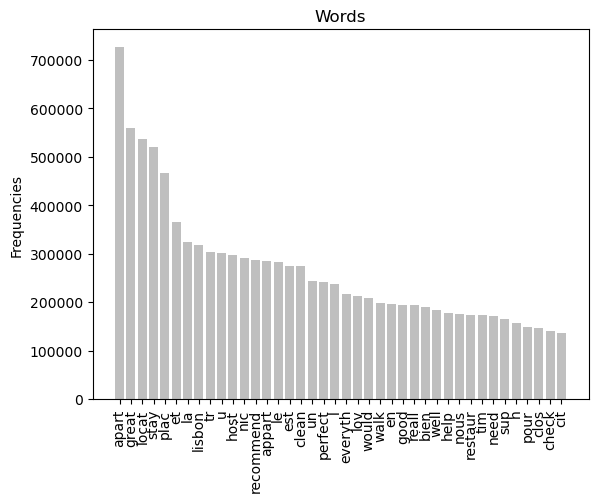

In [74]:
# create a list with all words in reviews_df_train['comments']
all_words_comments = ' '.join(updates_comments).split()

# The frequency of each word
freq_comments = pd.Series(all_words_comments).value_counts()

# A bar plot with the top 35 words, for 'comments' column
x_labels = freq_comments.index[0:40]
values = freq_comments[:40]
plt.bar(x_labels, values, align='center', alpha=0.5, color = 'grey')
plt.xticks(x_labels)
plt.ylabel('Frequencies')
plt.title('Words')
plt.xticks(rotation=90)
plt.show()

In [75]:
unique_words_comments = sorted(set(all_words_comments))
len(unique_words_comments)

121733

In [78]:
len(all_words_comments)

43131836

<div class="alert alert-block alert-success">
For comments, before the data preprocessing, we had 43.131.836 unique words after we reduced it to 121.733 words.

Update our data frame with the new text preprocessed

In [80]:
reviews_df_train.update(pd.DataFrame({"comments": updates_desc}))
reviews_df_train

,index,comments,language
0,1,shar mix room hostel shar bathroom locat right...,en
1,1,espa fic pert parqu eduard vii saldanh estefan...,so
2,1,traf hous coz famili vill facil need relax com...,en
3,1,apart charmos chi larg carm travess trindad es...,de
4,1,jol appart en bordur mer min pie la plag vue m...,en
...,...,...,...
1442799,12494,"We had a good time, the apartment has a great ...",en
1442800,12494,Great apartment in very central location. The ...,en
1442801,12494,"We are Airbnb Super Hosts too, so trust me, Li...",en
1442802,12494,We had a lovely stay at this apartment. Sofia ...,en


In [81]:
reviews_df_train['comments'] = reviews_df_train['comments'].astype('string')
reviews_df_train = reviews_df_train.dropna()

grouped = reviews_df_train.groupby(['index', 'language']).agg({'comments': 'count'})
grouped = grouped.reset_index()
final_grouped = grouped.groupby('index').agg({'language': 'nunique', 'comments': 'sum'})
final_grouped = final_grouped.reset_index()

# rename the columns to the desired names
final_grouped.columns = ['index', 'unique_languages_count', 'total_comments_count']
final_grouped

,index,unique_languages_count,total_comments_count
0,1,8,100
1,5,6,82
2,8,8,336
3,9,6,64
4,10,3,26
...,...,...,...
8461,12490,9,64
8462,12491,4,20
8463,12492,9,624
8464,12493,5,70


In [84]:
# English reviews

reviews_df_eng = reviews_df_train[(reviews_df_train['language']=='en')]

grouped_eng = reviews_df_eng.groupby(['index']).agg({'comments': ['count', ' '.join]})
grouped_eng.columns = ['_'.join(col).strip() for col in grouped_eng.columns.values]
grouped_eng = grouped_eng.reset_index()

# Rename the columns of the DataFrame
grouped_eng.columns = ['index', 'eng_comment_count', 'eng_reviews_merged']
grouped_eng

,index,eng_comment_count,eng_reviews_merged
0,1,60,shar mix room hostel shar bathroom locat right...
1,5,34,bom dia refurbish full equip tradit resident n...
2,8,290,desfrut son natur fic nest espa nic licens num...
3,9,32,oceanarium situat ocean front view atlant loca...
4,10,22,central hill apart compan apart cit cent ambit...
...,...,...,...
8295,12490,28,Excellent very well equiped apartment! Thank y...
8296,12491,14,I am so happy to found this accomodation near ...
8297,12492,424,We were very happy to find this place. The com...
8298,12493,54,"Nice place, nice location, easy communication!..."


In [85]:
merged_reviews = pd.merge(final_grouped, grouped_eng, on='index', how='left')
merged_reviews

,index,unique_languages_count,total_comments_count,eng_comment_count,eng_reviews_merged
0,1,8,100,60.0,shar mix room hostel shar bathroom locat right...
1,5,6,82,34.0,bom dia refurbish full equip tradit resident n...
2,8,8,336,290.0,desfrut son natur fic nest espa nic licens num...
3,9,6,64,32.0,oceanarium situat ocean front view atlant loca...
4,10,3,26,22.0,central hill apart compan apart cit cent ambit...
...,...,...,...,...,...
8461,12490,9,64,28.0,Excellent very well equiped apartment! Thank y...
8462,12491,4,20,14.0,I am so happy to found this accomodation near ...
8463,12492,9,624,424.0,We were very happy to find this place. The com...
8464,12493,5,70,54.0,"Nice place, nice location, easy communication!..."


In [138]:
# Merging reviews to train_df
train_df = pd.merge(airbnb_df_train, merged_reviews, on='index', how='left')
train_df.head()

,index,description,host_about,unlisted,language_description,language_host_about,unique_languages_count,total_comments_count,eng_comment_count,eng_reviews_merged
0,1,shar mix room hostel shar bathroom locat right...,aloj local registr al,0,en,pt,8.0,100.0,60.0,shar mix room hostel shar bathroom locat right...
1,2,espa fic pert parqu eduard vii saldanh estefan...,friend host tri alway around need anyth though...,1,pt,en,NaN,NaN,NaN,<NA>
2,3,traf hous coz famili vill facil need relax com...,social person lik communic read travel lik cin...,1,en,en,NaN,NaN,NaN,<NA>
3,4,apart charmos chi larg carm travess trindad es...,hell portugu lov meet peopl around word mayb o...,0,pt,en,NaN,NaN,NaN,<NA>
4,5,jol appart en bordur mer min pie la plag vue m...,nous somm une famill avec deux enfant et an no...,0,fr,fr,6.0,82.0,34.0,bom dia refurbish full equip tradit resident n...


In [139]:
# Scaling selected columns with MinMaxScaler
scaler = MinMaxScaler()
cols_to_scale = ['unique_languages_count', 'total_comments_count', 'eng_comment_count']
train_df[cols_to_scale] = scaler.fit_transform(train_df[cols_to_scale])

train_df.head()

,index,description,host_about,unlisted,language_description,language_host_about,unique_languages_count,total_comments_count,eng_comment_count,eng_reviews_merged
0,1,shar mix room hostel shar bathroom locat right...,aloj local registr al,0,en,pt,0.259259,0.041809,0.040194,shar mix room hostel shar bathroom locat right...
1,2,espa fic pert parqu eduard vii saldanh estefan...,friend host tri alway around need anyth though...,1,pt,en,NaN,NaN,NaN,<NA>
2,3,traf hous coz famili vill facil need relax com...,social person lik communic read travel lik cin...,1,en,en,NaN,NaN,NaN,<NA>
3,4,apart charmos chi larg carm travess trindad es...,hell portugu lov meet peopl around word mayb o...,0,pt,en,NaN,NaN,NaN,<NA>
4,5,jol appart en bordur mer min pie la plag vue m...,nous somm une famill avec deux enfant et an no...,0,fr,fr,0.185185,0.034130,0.022176,bom dia refurbish full equip tradit resident n...


In [164]:
train_df['eng_reviews_merged'].fillna(value = '', inplace = True)

<hr>
<a class="anchor" id="classificationmodels">
    
# 4. Classification Models
    
</a>

Split the dataset into train and validation and maintain the original format

In [143]:
train = train_df.sample(frac=0.8, random_state=1)
validation = train_df.drop(train.index)

Define the independent variable

In [144]:
x_train_1 = train['description']
x_train_1

13517    apart locat heart lisbon baix district rd floo...
10721    bright sunn studi complet refurbish one month ...
16697    morad modern situ are branc lourinh capacidad ...
17738    top floor reopen look plac quiet yet step away...
18449    spread across floor minimalist spacious apart ...
                               ...                        
22349    littl doubl room ground floor build room doubl...
12003    new furnitur sinc new bed new sofab cos retrea...
24684    spacious apart condominium quint gandarinh two...
13854    entir flat rent locat alfam histor part lisbon...
20559    room suit spacious light well decor privat bat...
Name: description, Length: 19994, dtype: object

In [145]:
x_train_2 = train['eng_reviews_merged']
x_train_2

13517    Sammuel's flat is really great, typical and pe...
10721    Sylvie was really helpfull despite my late arr...
16697    Excellent house for a really good price.The ho...
17738    It was surely the best place to stay in Lisbon...
18449    Water stopper is missing in the kitchen sink a...
                               ...                        
22349                                                     
12003    The location of the apartment couldn't be bett...
24684    Great location and an excellent choice for lar...
13854    Paulo is very helpful and communicative person...
20559    A good starting point to walk along and easily...
Name: eng_reviews_merged, Length: 19994, dtype: string

In [146]:
x_val_1 = validation['description']
x_val_1

14       spacious apart locat right cai sodr tak minut ...
15       supr well locat histor build design famous pom...
18       lov cas sobral locat littl villag sobral minut...
20       import respons covid propert extend clean disi...
27       apart constru localiz pis luzeir suit frent pr...
                               ...                        
24971    apart zon calm lisbo pr xim centr cidad ideal ...
24974    cos one bedroom apart bord lap sant design dis...
24976    spacious modern hous locat near magoit beach s...
24982    apart cas du mar localiz ericeir ribeir ilha e...
24990    terr eir cas camp rod rvor frut conv descans b...
Name: description, Length: 4998, dtype: object

In [147]:
x_val_2 = validation['eng_reviews_merged']
x_val_2

14                                                        
15       larg two bedroom apart near cit cent metr stat...
18       journey begin moment decid go giv first step c...
20                                                        
27                                                        
                               ...                        
24971    Very tidy and lovely apartment equipped with e...
24974    Nice apartment, well located in a quiet distri...
24976                                                     
24982    Great well equipped apartment, very clean and ...
24990                                                     
Name: eng_reviews_merged, Length: 4998, dtype: string

Define labels

In [148]:
y_train = np.array(train['unlisted'])
y_train

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [149]:
len(y_train)

19994

In [150]:
# get the unique values and their counts
unique_values, counts = np.unique(y_train, return_counts=True)

# calculate the percentage of each unique value
total = len(y_train)
percentages = counts / total * 100

# print the unique values, their counts, and their percentages
for i in range(len(unique_values)):
    print(f"{unique_values[i]} occurs {counts[i]} times ({percentages[i]:.2f}%)")

0 occurs 14459 times (72.32%)
1 occurs 5535 times (27.68%)


In [151]:
y_val = np.array(validation['unlisted'])
y_val

array([1, 0, 0, ..., 1, 0, 1], dtype=int64)

In [152]:
# get the unique values and their counts
unique_values, counts = np.unique(y_val, return_counts=True)

# calculate the percentage of each unique value
total = len(y_val)
percentages = counts / total * 100

# print the unique values, their counts, and their percentages
for i in range(len(unique_values)):
    print(f"{unique_values[i]} occurs {counts[i]} times ({percentages[i]:.2f}%)")

0 occurs 3607 times (72.17%)
1 occurs 1391 times (27.83%)


<div class="alert alert-block alert-danger"> 
The train and validation are both unbalanced but with the same proportion.

<hr>
<a class="anchor" id="bow">
    
## 4.1. Define training features - Bag of Words (Bow)
    
</a>

Create BoW from train corpus

In [155]:
bow_desc = CountVectorizer(binary=True)     
bow_reviews = CountVectorizer(binary=True, max_features=1000) 

X_train_1_bow = bow_desc.fit_transform(x_train_1)
X_train_1_bow

X_train_2_bow = bow_reviews.fit_transform(x_train_2)
X_train_2_bow

print(X_train_1_bow.shape, X_train_2_bow.shape)

(19994, 14483) (19994, 1000)


In [167]:

n1 = X_train_1_bow.shape[1]
n2 = X_train_2_bow.shape[1]
n_additional = len(cols_to_scale)

X_train_ext = np.zeros((X_train_1_bow.shape[0], n1 + n2 + n_additional))


X_train_ext[:, :n1] = X_train_1_bow.toarray() # copy over TF-IDF for cleaned AirBnb description
X_train_ext[:, n1:n1+n2] = X_train_2_bow.toarray() # copy over TF-IDF for cleaned English reviews
X_train_ext[:, n1+n2:] = train[cols_to_scale].values # copy over the count columns

X_train_ext = np.nan_to_num(X_train_ext, nan=0) # filling in empty values with zeroes

X_train_ext.shape

(19994, 15486)

For validation

In [180]:
X_val_1_bow = bow_desc.transform(validation["description"])
X_val_2_bow = bow_reviews.transform(validation["eng_reviews_merged"])                            
n1 = X_val_1_bow.shape[1]
n2 = X_val_2_bow.shape[1]
n_additional = len(cols_to_scale)

X_val_ext = np.zeros((X_val_1_bow.shape[0], n1 + n2 + n_additional))
X_val_ext[:, :n1] = X_val_1_bow.toarray()      # copy over TF-IDF for cleaned AirBnb description
X_val_ext[:, n1:n1+n2] = X_val_2_bow.toarray() # copy over TF-IDF for cleaned English reviews
X_val_ext[:, n1+n2:] = validation[cols_to_scale].values   # copy over the count columns

X_val_ext = np.nan_to_num(X_val_ext, nan=0)   # filling in empty values with zeroes                                 

y_val = np.array(validation['unlisted'])

print(X_val_ext.shape, y_val.shape)

(4998, 15486) (4998,)


In [181]:
def plot_cm(confusion_matrix : np.array, 
            classnames : list):
    """
    Function that creates a confusion matrix plot using the Wikipedia convention for the axis. 
    :param confusion_matrix: confusion matrix that will be plotted
    :param classnames: labels of the classes
    
    Returns:
        - Plot of the Confusion Matrix
    """
    
    confusionmatrix = confusion_matrix
    class_names = classnames             

    fig, ax = plt.subplots()
    im = plt.imshow(confusionmatrix, cmap=plt.cm.cividis)
    plt.colorbar()

    # We want to show all ticks...
    ax.set_xticks(np.arange(len(class_names)))
    ax.set_yticks(np.arange(len(class_names)))
    # ... and label them with the respective list entries
    ax.set_xticklabels(class_names)
    ax.set_yticklabels(class_names)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    for i in range(len(class_names)):
        for j in range(len(class_names)):
            text = ax.text(j, i, confusionmatrix[i, j],
                           ha="center", va="center", color="w")

    ax.set_title("Confusion Matrix")
    plt.xlabel('Targets')
    plt.ylabel('Predictions')
    plt.ylim(top=len(class_names)-0.5)  # adjust the top leaving bottom unchanged
    plt.ylim(bottom=-0.5)  # adjust the bottom leaving top unchanged
    return plt.show()

<hr>
<a class="anchor" id="KNN">
    
## 4.2. KNeighborsClassifier
    
</a>

In [185]:
labels = {"Unlisted":1, "Listed":0}

              precision    recall  f1-score   support

    Unlisted       0.98      0.98      0.98      3599
      Listed       0.94      0.94      0.94      1399

    accuracy                           0.97      4998
   macro avg       0.96      0.96      0.96      4998
weighted avg       0.97      0.97      0.97      4998



C:\Users\katxi\AppData\Local\Temp\ipykernel_35336\1314786959.py:39: UserWarning: Attempting to set identical bottom == top == 1.5 results in singular transformations; automatically expanding.
  plt.ylim(top=len(class_names)-0.5)  # adjust the top leaving bottom unchanged


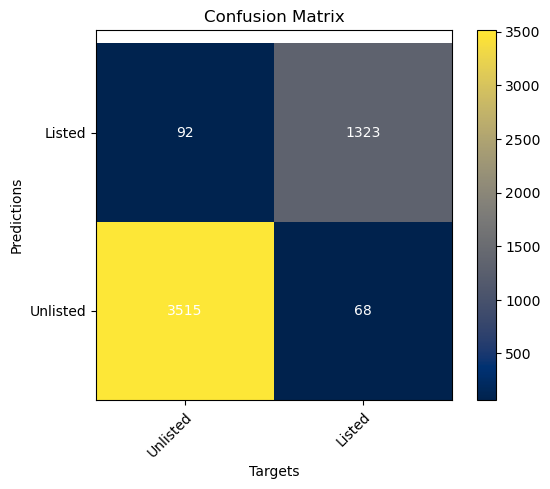

In [183]:
modelknn = KNeighborsClassifier(n_neighbors = 10, metric = 'cosine', weights = 'distance')

modelknn.fit(X_train_ext,y_train)

# Prediction
y_pred_knn = modelknn.predict(X_val_ext)

# Evaluation
print(classification_report(y_pred_knn, y_val, target_names = labels.keys()))

plot_cm(confusion_matrix(y_pred, y_val), labels.keys())

<hr>
<a class="anchor" id="randomforest">
    
## 4.3. Random Forest
    
</a>

              precision    recall  f1-score   support

    Unlisted       0.97      0.98      0.98      3583
      Listed       0.95      0.93      0.94      1415

    accuracy                           0.97      4998
   macro avg       0.96      0.96      0.96      4998
weighted avg       0.97      0.97      0.97      4998



C:\Users\katxi\AppData\Local\Temp\ipykernel_35336\1314786959.py:39: UserWarning: Attempting to set identical bottom == top == 1.5 results in singular transformations; automatically expanding.
  plt.ylim(top=len(class_names)-0.5)  # adjust the top leaving bottom unchanged


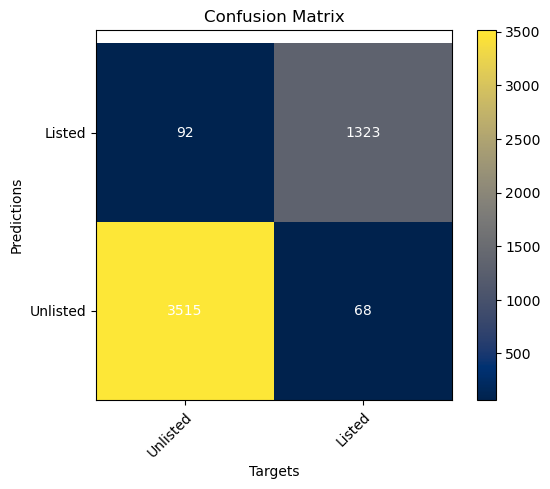

In [179]:
model_forest = RandomForestClassifier(n_estimators=100, 
                                      class_weight={0: 0.7, 1: 0.3}, 
                                      random_state=42)

model_forest.fit(X_train_ext, y_train)

# Predicting
y_pred = model_forest.predict(X_val_ext)

# Evaluation
print(classification_report(y_pred, y_val, target_names = labels.keys()))
plot_cm(confusion_matrix(y_pred, y_val), labels.keys())